In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3f509ebe-f6ea-423a-8765-74d8f37a1a76',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [13]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3f509ebe-f6ea-423a-8765-74d8f37a1a76',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# Go to Anaconda Prompt and insert "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Copy the localhost url at the bottom of results and paste it in the browser and look for your file name and click on it. 
# The localhost url should look like something like this " http://localhost:8890/?token=94"
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    if not os.path.isfile(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [ ]:
df

In [ ]:
df72 = pd.read_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv')
df72

In [19]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [ ]:
df4 = df3.stack()
df4

In [23]:
type(df3)

pandas.core.frame.DataFrame

In [24]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [26]:
df5.count()

values    90
dtype: int64

In [ ]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

In [ ]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

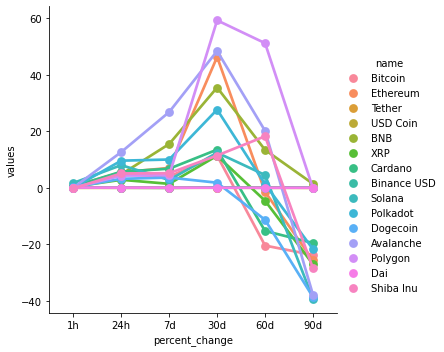

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)